**Assignment-07**

**Write a python program to apply KNN (Classification + Regression) algorithm on the given datasets using Scikit-learn and also plot accuracy and mean error vs k value for both. (Find the datasets attached along with this assignment)**

In [1]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving heart.csv to heart.csv
Saving wine.csv to wine.csv


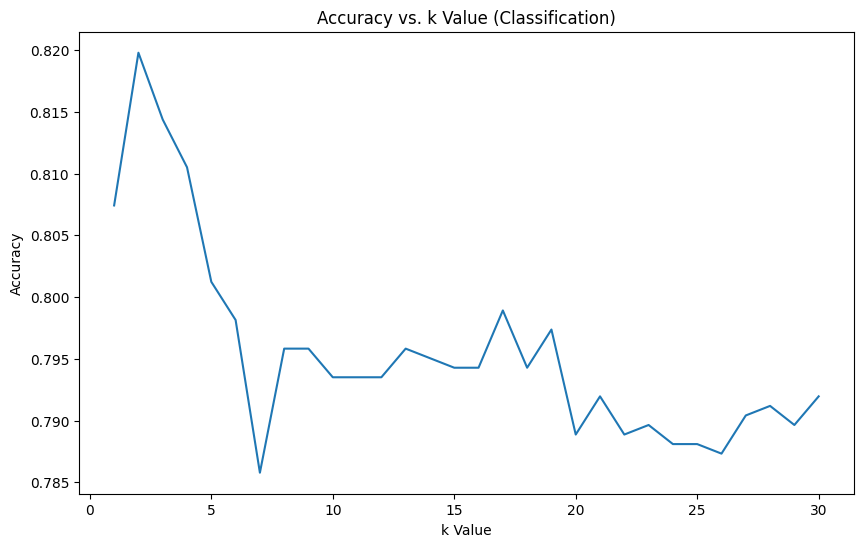

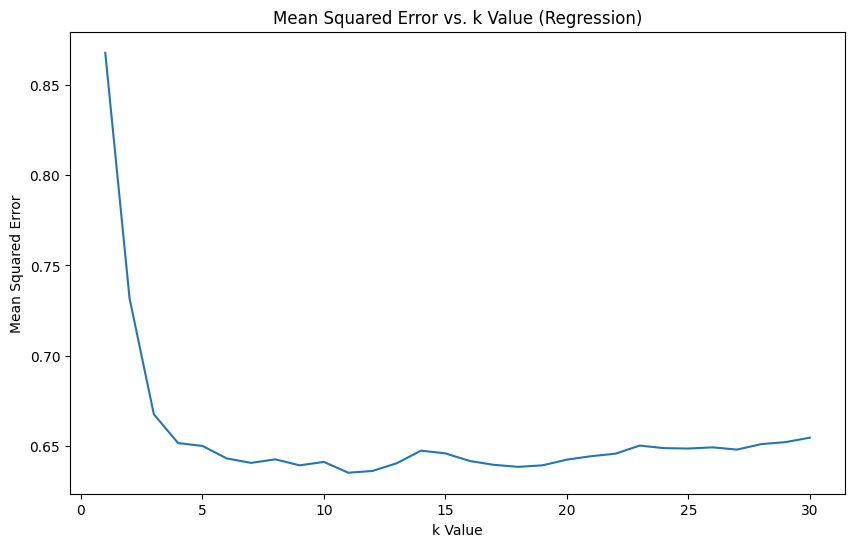

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("wine.csv")

# Separate features and target
X = data.drop(['quality', 'good/bad'], axis=1)
y_class = data['good/bad'].map({'bad': 0, 'good': 1})
y_reg = data['quality']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Label encode categorical columns
label_encoder = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Split the data into training and testing sets
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Define a range of k values
k_range = range(1, 31)

# Classification
accuracy_scores = []
for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train_class)
    y_pred_class = knn_classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test_class, y_pred_class))

# Regression
mse_scores = []
for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_reg, y_train_reg)
    y_pred_reg = knn_regressor.predict(X_test_reg)
    mse_scores.append(mean_squared_error(y_test_reg, y_pred_reg))

# Plot accuracy vs. k value for classification
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value (Classification)')
plt.show()

# Plot mean squared error vs. k value for regression
plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_scores)
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. k Value (Regression)')
plt.show()


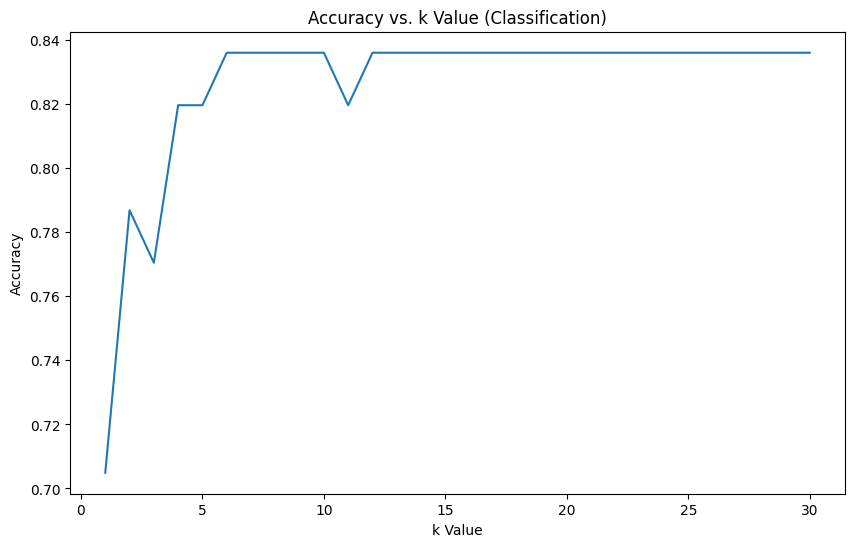

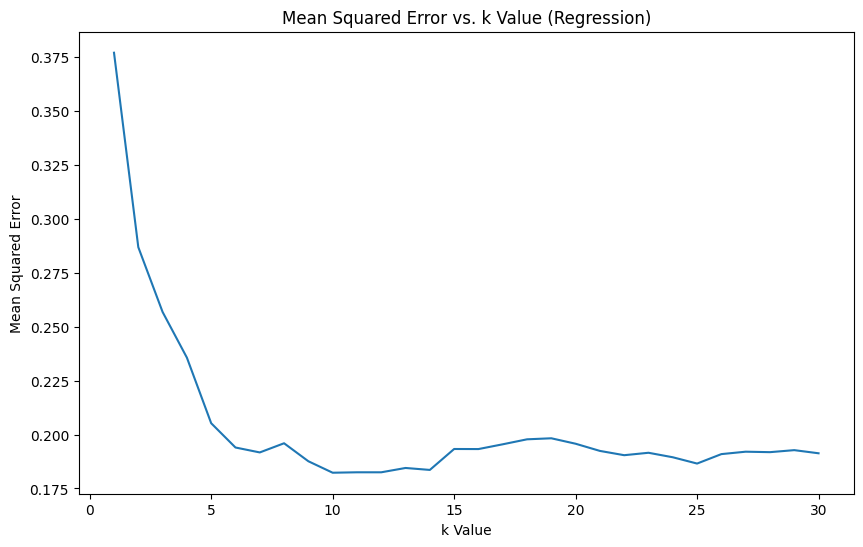

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("heart.csv")

# Separate features and target
X = data.drop(['target', 'status'], axis=1)
y_class = data['status'].map({'bad': 0, 'good': 1})
y_reg = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(X, y_class, y_reg, test_size=0.2, random_state=42)

# Define a range of k values
k_range = range(1, 31)

# Classification
accuracy_scores = []
for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train_class)
    y_pred_class = knn_classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test_class, y_pred_class))

# Regression
mse_scores = []
for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train_reg)
    y_pred_reg = knn_regressor.predict(X_test)
    mse_scores.append(mean_squared_error(y_test_reg, y_pred_reg))

# Plot accuracy vs. k value for classification
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value (Classification)')
plt.show()

# Plot mean squared error vs. k value for regression
plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_scores)
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. k Value (Regression)')
plt.show()